0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=Spherical(c=0.005), interact_mode=transmit)
2 Surface(profile=Spherical(c=-0.001851851851851852), interact_mode=transmit)
3 Surface(profile=Spherical(c=0.00885982865091389), interact_mode=transmit)
4 Surface(profile=Spherical(c=-0.0016666666666666668), interact_mode=transmit)
5 Surface(profile=Spherical(c=-0.0020833333333333333), interact_mode=transmit)
6 Surface(profile=Spherical(c=0.002316235653815419), interact_mode=transmit)
7 Surface(profile=Spherical(c=-0.0025906735751295338), interact_mode=transmit)
8 Surface(profile=Spherical(c=-0.008), interact_mode=transmit)
9 Surface(profile=Spherical(c=0.0034942432342715377), interact_mode=transmit)
10 Surface(profile=Spherical(c=-0.00620347394540943), interact_mode=transmit)
11 Surface(profile=Spherical(c=0.014746000147460001), interact_mode=transmit)
12 Surface(profile=Spherical(c=0.005847953216374269), interact_mode=transmit)
13 Surface(profile=Spher

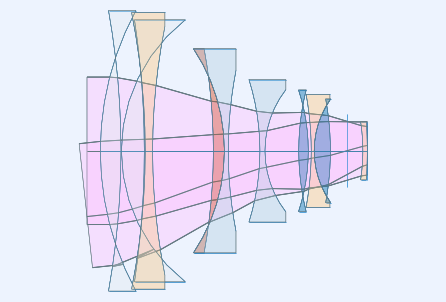

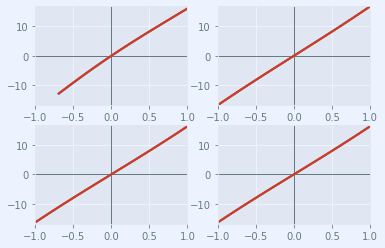

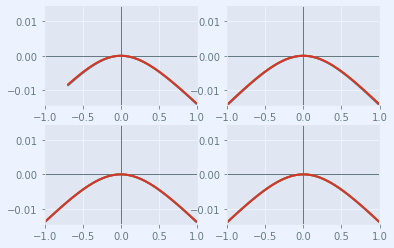

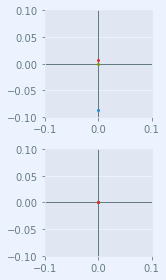

In [2]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# AI Nikkor 200mm f/2S IF-ED (US 4,176,913 Example 2)
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=2)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 6.16])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'AI Nikkor 200mm f/2S IF-ED (US 4,176,913 Example 2)'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([200,14,1.50032,81.9])
sm.ifcs[-1].max_aperture = 51.025
sm.add_surface([-540,0.3])
sm.ifcs[-1].max_aperture = 51.025
sm.add_surface([112.869,15.5,1.50032,81.9])
sm.ifcs[-1].max_aperture = 48.64
sm.add_surface([-600,0.65])
sm.ifcs[-1].max_aperture = 47.805
sm.add_surface([-480,5,1.7552,27.5])
sm.ifcs[-1].max_aperture = 47.805
sm.add_surface([431.735,41.201])
sm.ifcs[-1].max_aperture = 45.255
sm.add_surface([-386,7.5,1.79504,28.4])
sm.ifcs[-1].max_aperture = 34.51
sm.add_surface([-125,2.6,1.4645,65.8])
sm.ifcs[-1].max_aperture = 34.06
sm.add_surface([286.185,21.5])
sm.ifcs[-1].max_aperture = 34.06
sm.add_surface([-161.2,3.4,1.4645,65.8])
sm.ifcs[-1].max_aperture = 27.625
sm.add_surface([67.815,22.912])
sm.ifcs[-1].max_aperture = 26.315
sm.add_surface([171,6.5,1.6935,53.6])
sm.ifcs[-1].max_aperture = 26.855
sm.add_surface([-131.975,2])
sm.ifcs[-1].max_aperture = 26.855
sm.add_surface([-213,2,1.59507,35.6])
sm.ifcs[-1].max_aperture = 26.185
sm.add_surface([61,11,1.6968,55.6])
sm.ifcs[-1].max_aperture = 25.345
sm.add_surface([-193.237,11.1])
sm.ifcs[-1].max_aperture = 25.345
sm.add_surface([0,10.9])
sm.set_stop()
sm.ifcs[-1].max_aperture = 20.029
sm.add_surface([-130,3,1.4645,35.74])
sm.ifcs[-1].max_aperture = 19.32
sm.add_surface([-311.705,0])
sm.ifcs[-1].max_aperture = 17.87
sm.list_surfaces()
sm.list_gaps()
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()